<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_147to174.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> ## **03 평가**



**머신러닝**
: 데이터 가공/변환 - 모델 학습/예측 - 평가(Evaluation)

이때 평가할 때 여러가지 방법으로 예측 성능을 평가할 수 있고, 
**성능 평가 지표** 는 모델이 분류/회귀 인지에 따라 달라짐

- 회귀: 실제값과 예측값의 오차 평균값에 기반
- 분류: 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반, 하지만 정확도만 가지고 판단하면 잘못된 평가 결과에 빠질 수 있음

**분류의 성능 평가 지표**
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC

결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결과값만을 가지는 이진 분류와 여러 개의 결정 클래스 값을 갖는 멀티 분류로 나눌 수 있고, 위의 평가 지표는 이진 분류에서 강조됨


---



## **01 정확도(Accuracy)**



---

실제 데이터에서 예측 데이터가 얼마나 같은지를 판단

### ***정확도(Accuracy) = (예측 결과가 동일한 데이터 건수)/(전체 예측 데이터 건수)***

이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있으므로 하나만 가지고 성능을 평가하지 않음

*(범주형에서) 이진 분류에서 애초에 결과값의 차이가 매우 크다면 그냥 큰쪽에 맞춰서 전부 몰아서 예측하면 정확도는 매우 좋게 나오지만 Recall 값은 0으로 나오거나 할 수 있음


In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  #fit( ) 메서드는 아무것도 학습하지 않음.
  def fit(self, X, y=None):
    pass
  # predict( ) 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
  def predict(self, X):
    pred=np.zeros( ( X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] ==1:
        pred[i]=0
      else:
        pred[i]=1
    
    return pred

In [3]:
#이전에 사용했던 transform_features 함수 사용

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df
                  
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le=LabelEncoder()
    le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [4]:
import pandas as pandas
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

In [5]:
myclf=MyDummyClassifier()
myclf.fit(X_train, y_train)

In [6]:
mypredictions=myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는: 0.7877


단순한 알고리즘으로 예측해도 78%의 정확도를 보이고 있기 때문에 이것만으로 판단하기에는 무리가 있음

이처럼 **불균형한 레이블 값 분포** 에서 ML 모델의 성능을 판단할 경우에는 **부적합**


---


MNIST 데이터 세트: 0부터 9까지의 숫자 이미지의 픽셀 정보, 이를 기반으로 숫자 Digit을 예측
- 레이블 값이 인 것만 True 나머지는 False
- 이와같이 이진분류로 바꾸면 저체 데이터의 10%만 True 나머지 90%는 False인 불균형 데이터

**이때 모두 예측값을 False로 하면 90퍼센트의 예측 정확도**


In [7]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass
  #입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어 반환
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

digits=load_digits()

y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test= train_test_split(digits.data, y, random_state=11)

In [8]:
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

#pd.Series 함수를 이용하면 그냥 vector에도 value_counts( ) 사용

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64


In [9]:
fakeclf=MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는: 0.900


## **02 오차 행렬 (confustion matricx, 혼동행렬)**

---

오차행렬은 예측을 수행하면서 얼마나 헥갈리고 있는지도 함께 보여주는 지표

**오차행렬**
: 4분면으로 나누어 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative와 Positive로 분류, 위 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류

- TN: True Negative
- FP: False Positive
- FN: False Negative
- TP: True Positive

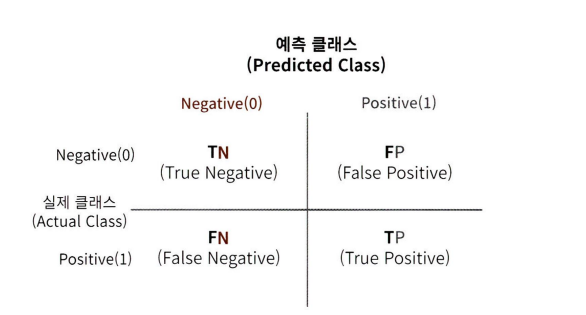

* 사이킷런에서 confusion_matrix( ) API 제공

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

TN=405, FP=0

FN=45,  TP=0

**정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP)/(TN + FP + FN + TP)**

Positive 양성으로 1, Negatie 음성으로 0 값을 각각 할당

불균형한 이진 분류 데이터 세트에서는 Positice 데이터 건수가 매우 작기 때문에 Negative로 예측 정확도가 높아지는 경향이 발생

그러므로 정확도는 분류 모델의 성능을 측정할 수 있는 한가지 요소이고 판단 오류를 일으키는 경우가 많으므로 **정밀도(Precision)와 재현율(Recall)**을 알아보자.



## **03 정밀도와 재현율**

---

Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춤

**정밀도 = TP / (FP + TP)**

**재현율 = TP / (FN + TP)**

정밀도는 예측을 Positive로 한 대상 중 예측과 실제 값이 Positice로 일치한 데이터 비율

재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터 비율

** 업무에 따라 정밀도와 재현율 지표 중에 더 중요한 지표로 간주될 수 있음

사이킷런에서 API 제공

- 정밀도: **precision_score( )**
- 재현율: **recall_score( )**


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#confusion matrix, accuracy, precision, recall 등 다양한 평가 호출: **get_clf_eval( )**

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df=pd.read_csv('/titanic_train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train, X_test, y_train, y_test= train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf=LogisticRegression()

lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


정밀도에 비해 재현율이 낮음 -> 재현율 또는 정밀도를 좀 더 강화

### **정밀도/재현율 트레이드오프**

정밀도와 재현율은 상호 보완적인 평가 지표이므로 한쪽을 강제로 높이면 다른 하나는 수치가 떨어짐

사이킷런의 분류 알고리즘은 각각 레이블별 결정 확률을 구하고 더 큰 확률을 가진 것을 예측값으로 함

**predict_proba( )**: 예측 확률을 반환

In [13]:
pred_proba=lr_clf.predict_proba(X_test)
pred=lr_clf.predict(X_test)
print('pred_proba( ) 의 결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba_result=np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba( ) 의 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


현재 임계값은 0.5로 설정

이때 임곗값을 Binarizer 클래스를 이용하여 변경하여 트레이드 오프 방식 이해

In [14]:
from sklearn.preprocessing import Binarizer

X=[[1, -1, 2],
   [2, 0, 0],
   [0, 1.1, 1.2]]

binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))
#1.1보다 크면 1을 갖도록

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.5

pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [16]:
#임곗값을 0.4로
custom_threshold=0.4

pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


정확도는 올라가고 정밀도는 올라감

- 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 되므로 임곗값을 낮추면 True 값이 많아짐
- 그러므로 재현율은 높아지고 실제 양성을 음성으로 예측하는 회수는 상대적으로 줄어들기 때문

0.4부터 0.6까지 0.05씩 증가시키며 평가 지표 조사

In [17]:
thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]

In [18]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict=binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


Precision_recall_curve( )

- 입력 파라미터:

y_true: 실제 클래스 값 배열

probas_pred: Positive 칼럼의 예측 확률 배열

- 반환 값:

정밀도

재현율

In [19]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임계값을 15 Step으로 추출
thr_index=np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))


반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

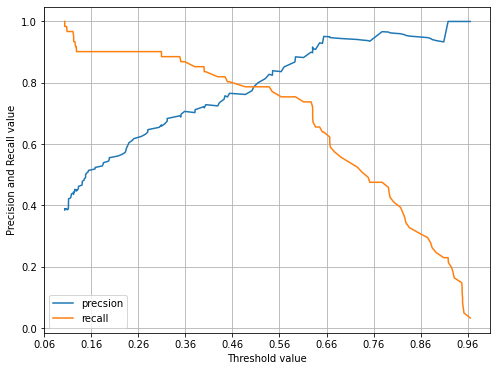

In [21]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precsion')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend( ); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### **정밀도와 재현율의 맹점**

임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
-> 그러므로 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

- 정밀도 100%가 되는 방법

:확실한 기준이 되는 경우만 Positice로 에측하고 나머지는 모두 Negative로 예측

FP=0, TP=1

- 재현율이 100%가 되는 방법

: 모든 환자를 Positive로 예측

TP=30, FN=0

## **04 F1 스코어**

---

- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐


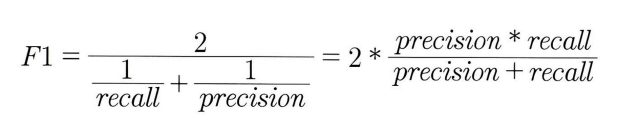

In [22]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [26]:
#get_clf_eval() 함수에 F1 스코어 추가

def get_clf_eval(y_test, pred):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)

  f1=f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


임곗값이 0.6일 때 F1 값이 가장 높게 나오고 있음

## **05 ROC 곡선과 AUC**

- ROC 곡선: 수신자 판단 곡선, FPR을 X축, TPR을 Y축으로
- TPR=True Positive Rate=재현율, 민감도=**TP/(FN + TP)**
- TNR=True Negative Rate=특이성=**TN/(FP + TN)**
- FPR=False Positive Rate= 1- 특이성=**FP/(FP + TN)**

---

ROC 곡선은 대각선으로 이은 직선과 멀수록 성능이 좋고 가까울수록 성능이 안좋음

FPR을 변경하면서 TPR의 변화 값을 구함

FPR=0 : 임곗값이 1 = positive로 예측하는 경우가 없으므로 FP=0

FPR=1 : 임곗값이 0 = 전부 positive로 예측하므로 TN=0이 됨

---
### **roc_curve( )**:

- 입력 파라미터: y_true: 실제 클래스 값 arrary, y_score: predict_prova의 반환 값
- 반환값: fpr, thresholds



In [31]:
from sklearn.metrics import roc_curve
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds=roc_curve(y_test, pred_proba_class1)

thr_index=np.arange(0, thresholds.shape[0],5)
#결과값이 똑같이 나오려면 0부터 시작해야하는데 왜 교재에는 1부터 시작하는가?..

print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ',np.round(thresholds[thr_index],2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


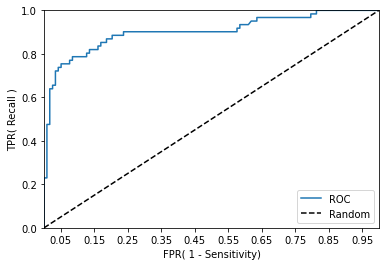

In [34]:
def roc_curve_plot(y_test, pred_proba_c1):
  # 임곘값에 따른 FPR, TPR 값을 반환받음
  fprs, tprs, thresholds=roc_curve(y_test, pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1], 'k--', label='Random')

  # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR( 1 - Sensitivity)'); plt.ylabel('TPR( Recall )')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

#기존의 교재에 있는 y_target, preds가 뭔지 모르겠습니다.

print(confusion_matrix(y_test, pred))
print('정확도: ', np.round(accuracy_score(y_test, pred), 4))
print('정밀도: ', np.round(precision_score(y_test, pred), 4))
print('재현율: ', np.round(recall_score(y_test, pred), 4))

[[104  14]
 [ 13  48]]
정확도:  0.8492
정밀도:  0.7742
재현율:  0.7869


In [41]:
#get_clf_eval에 ROC AUC 값추가

def get_clf_eval(y_test, pred):
  confusion=confusion_matrix(y_test, pred)
  accuracy=accuracy_score(y_test, pred)
  precision=precision_score(y_test, pred)
  recall=recall_score(y_test, pred)
  f1=f1_score(y_test, pred)

  roc_auc=roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)

  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
